In [1]:
import pandas as pd
# csv 파일을 로딩
df = pd.read_csv("Data/customer.csv")
df.head()

,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [3]:
df.Churn.value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

In [4]:
df.columns

Index(['Int'l Plan', 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn'],
      dtype='object')

In [7]:
x = df[df.columns[:-1]]
y = df.Churn

In [8]:
from imblearn.under_sampling import RandomUnderSampler
x_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(x,y)
x_samp = pd.DataFrame(data=x_sample, columns = df.columns[:-1])
y_samp = pd.DataFrame(data=y_sample, columns = ['Churn'])
df_samp = pd.concat([x_samp, y_samp], axis = 1)

x = x_samp[df_samp.columns[:-1]]
y = y_samp['Churn']

<Axes: >

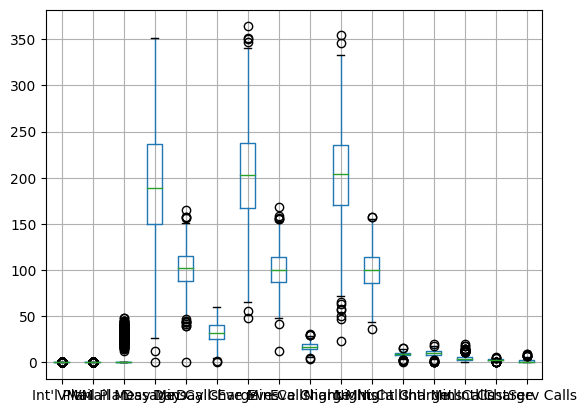

In [10]:
import matplotlib.pyplot as plt
import mglearn

x.boxplot()

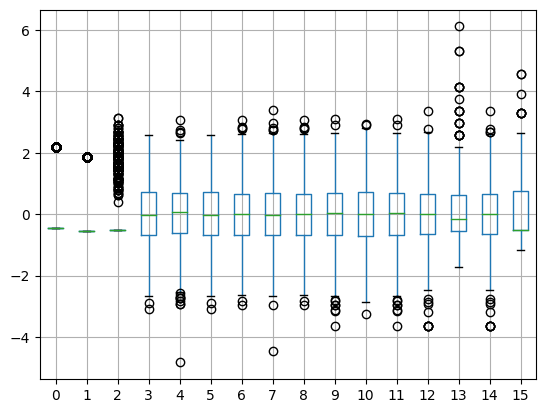

In [11]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x)
x_scaled = pd.DataFrame(ss.transform(x))

x_scaled.boxplot()
plt.show()

In [20]:
import warnings
warnings.filterwarnings('ignore')

# FutureWarning 제거
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

In [22]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
import numpy as np

svm = SVC()
n_estimators = 10
model = BaggingClassifier(base_estimator = svm, n_estimators = n_estimators, max_samples = 1/n_estimators)   # 10 set 만들어서 해보기


In [23]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
costs = np.logspace(-10, 3, 14)  # 10의 -10승부터 10의 3승까지, 14개
scores = []
for c in costs:
    model.base_estimator.C = c
    cv = StratifiedKFold(n_splits = 5, random_state = 10, shuffle = True)
    this_scores = cross_val_score(model, x_scaled, y, cv = cv, scoring = 'accuracy')
    score = np.max(this_scores)
    print(c, ' → ' , score)
    scores.append(score)

print('max:',max(scores))    
print('idx:',np.argmax(scores))
print('C:',costs[np.argmax(scores)]) 

1e-10  →  0.5025906735751295
1e-09  →  0.5025906735751295
1e-08  →  0.5025906735751295
1e-07  →  0.5025906735751295
1e-06  →  0.5025906735751295
1e-05  →  0.5025906735751295
0.0001  →  0.5025906735751295
0.001  →  0.5025906735751295
0.01  →  0.5025906735751295
0.1  →  0.5025906735751295
1.0  →  0.8652849740932642
10.0  →  0.8652849740932642
100.0  →  0.8704663212435233
1000.0  →  0.8601036269430051
max: 0.8704663212435233
idx: 12
C: 100.0


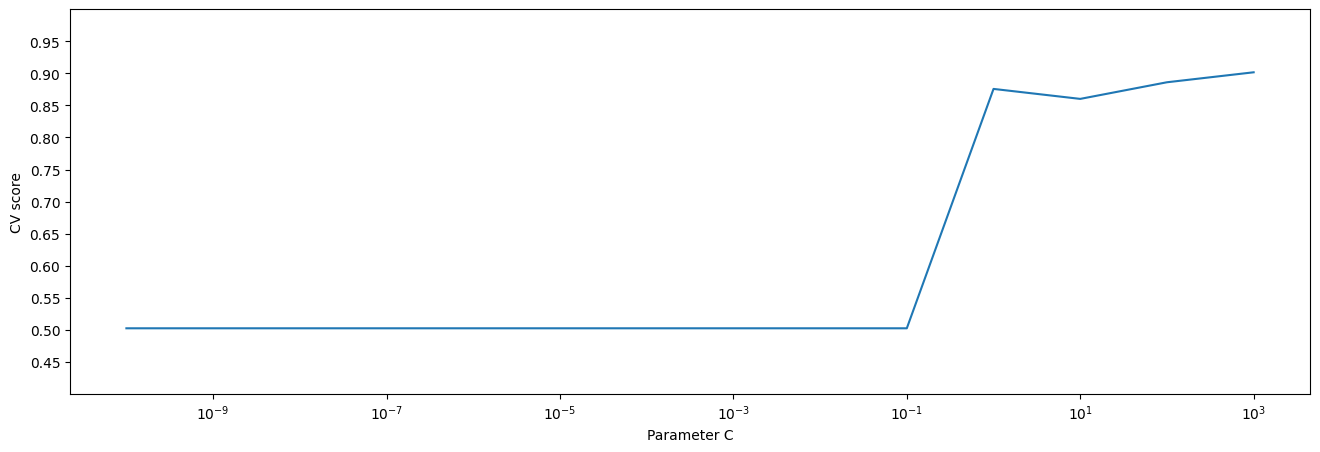

In [17]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(16,5)
plt.semilogx(costs, scores)
locs, labels = plt.yticks()
plt.yticks(locs)
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0.4, 1)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
x_tr, x_ts, y_tr, y_ts = train_test_split(x, y, test_size = 0.2, stratify = y, random_state=10)

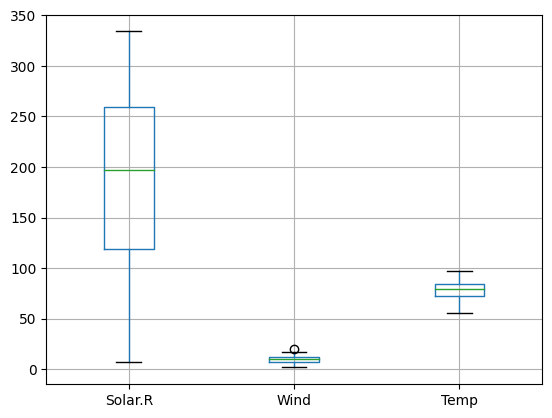

In [15]:
x_tr.boxplot()
plt.show()

In [18]:
model = SVC(random_state = 10)
model.fit(x_tr_scaled, y_tr)
pred = model.predict(x_ts)
print('학습용: ', model.score(x_tr_scaled, y_tr))
print('검증용: ', model.score(x_ts_scaled, y_ts))

학습용:  0.7391304347826086
검증용:  0.8620689655172413


c:\Python\Python39\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [19]:
tr_rate, ts_rate = [], []
c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
g_values = [0.0001, 0.001, 0.01, 0.1]

for n in c_values:
    for g in g_values:
        model = SVC(C=n, gamma=g, random_state = 10)
        model.fit(x_tr_scaled, y_tr)
        tr_rate.append([n, g, model.score(x_tr_scaled, y_tr)])
        ts_rate.append([n, g, model.score(x_ts_scaled, y_ts)])

In [22]:
train_arr = np.array(tr_rate)
test_arr = np.array(ts_rate)
max_rate = np.max(test_arr[:,2])
idx = np.where(test_arr[:,2] == max_rate)[0][0]
print('최적의 c: ', ts_rate[idx][0])
print("최적의 gamma:",ts_rate[idx][1])
print("최적의 정확도:",ts_rate[idx][2])   

최적의 c:  1
최적의 gamma: 0.1
최적의 정확도: 0.8620689655172413


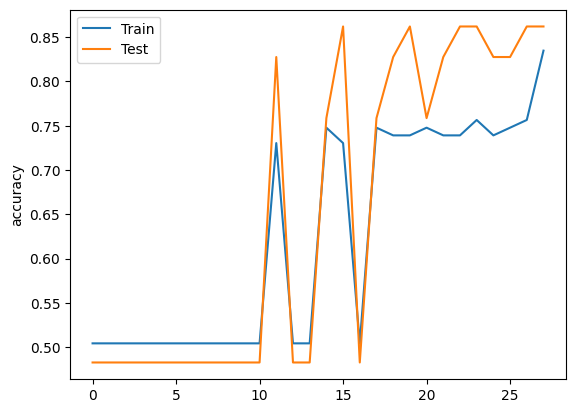

In [23]:
plt.plot(range(len(tr_rate)), train_arr[:,2], label="Train")
plt.plot(range(len(ts_rate)), test_arr[:,2], label="Test")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [27]:
# 최적 모형
model = SVC(C=100, gamma = 0.01, random_state = 10)
model.fit(x_tr_scaled, y_tr)
print('학습용: ', model.score(x_tr_scaled, y_tr))
print('검증용: ', model.score(x_ts_scaled, y_ts))

학습용:  0.7391304347826086
검증용:  0.8620689655172413


In [24]:
# 최적 모형
model = SVC(C=1, gamma = 0.1, random_state = 10)
model.fit(x_tr_scaled, y_tr)
print('학습용: ', model.score(x_tr_scaled, y_tr))
print('검증용: ', model.score(x_ts_scaled, y_ts))

학습용:  0.7304347826086957
검증용:  0.8620689655172413


In [25]:
from sklearn.metrics import confusion_matrix
pred = model.predict(x_ts_scaled)
confusion_matrix(y_ts, pred)

array([[13,  1],
       [ 3, 12]], dtype=int64)

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_ts, pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.92      0.80      0.86        15

    accuracy                           0.86        29
   macro avg       0.87      0.86      0.86        29
weighted avg       0.87      0.86      0.86        29

